# Linear Regression Model With Fast API

## Project Description:

This project explores the application of linear regression to analyze economic trends in Africa, specifically focusing on Nigeria's GDP per capita. By leveraging data-driven insights, I aim to identify opportunities for economic growth and social development, ultimately empowering African youth through technology and innovation.

Key Objectives:

- Data Analysis: Clean, preprocess, and visualize historical GDP data for Nigeria.
- Model Development: Build and train a linear regression model to predict future GDP trends.
- Model Evaluation: Assess the model's performance using appropriate metrics.
- Policy Implications: Analyze the model's results to identify potential policy interventions and recommendations.

## Potential Use Cases:

- Economic Forecasting: Predict future economic trends to inform investment decisions and policymaking.
- Education Policy: Analyze the impact of education spending on economic growth.
- Social Development: Identify areas where targeted interventions can have the greatest impact.

## Project Structure:

- Data: Raw data, cleaned data, and processed data.
- Code: Python scripts for data analysis, model training, and visualization.
- Models: Trained models and their parameters.
- Results: Visualizations, reports, and insights derived from the analysis.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [2]:
# Loaded the data
df = pd.read_csv('nigerian_data.csv')

# Extracted GDP data from 2000 to 2023
gdp_data = df[['year', 'GDP per capita (current US$)']].copy()
gdp_data = gdp_data[gdp_data['year'] >= 2000].dropna()
gdp_data.columns = ['Year', 'GDP']

print("Dataset shape:", gdp_data.shape)
print("\nSummary statistics:")
print(gdp_data.describe())
gdp_data.head()

Dataset shape: (21, 2)

Summary statistics:
              Year          GDP
count    21.000000    21.000000
mean   2010.000000  1887.552042
std       6.204837   792.434103
min    2000.000000   567.930736
25%    2005.000000  1268.383443
50%    2010.000000  2032.729709
75%    2015.000000  2292.445156
max    2020.000000  3222.693537


,Year,GDP
40,2000.0,567.930736
41,2001.0,590.381815
42,2002.0,741.747511
43,2003.0,795.386247
44,2004.0,1007.874328


In [3]:
# Prepare features and target
X = gdp_data['Year'].values.reshape(-1, 1)
y = gdp_data['GDP'].values.reshape(-1, 1)

# Scale both features and target
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y).ravel()

# Create enhanced features
X_enhanced = np.column_stack([
    X_scaled,
    X_scaled ** 2,
    np.sin(2 * np.pi * X_scaled),
    np.cos(2 * np.pi * X_scaled)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,
                                                    test_size=0.2,
                                                    random_state=42)

X_train_enhanced, X_test_enhanced, y_train_enhanced, y_test_enhanced = train_test_split(
    X_enhanced, y_scaled, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (16, 1)
Test set shape: (5, 1)


In [4]:
# Initialize models
models = {
    'linear': LinearRegression(),
    'random_forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=5,
        min_samples_split=3,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42
    )
}

# Train base models
for name, model in models.items():
    print(f"\nTraining {name} model...")
    model.fit(X_train, y_train)

    # Calculate and print performance metrics
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE (scaled): {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Train enhanced Random Forest
rf_enhanced = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
rf_enhanced.fit(X_train_enhanced, y_train_enhanced)


Training linear model...
RMSE (scaled): 0.64
R2 Score: 0.69

Training random_forest model...
RMSE (scaled): 0.39
R2 Score: 0.88


RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=3, random_state=42)


Linear Model Predictions:
Year 2024: $3145.97
Year 2025: $3233.40
Year 2026: $3320.83
Year 2027: $3408.26
Year 2028: $3495.69
Year 2029: $3583.12
Year 2030: $3670.55

Random Forest Model Predictions:
Year 2024: $2123.45
Year 2025: $2222.89
Year 2026: $2150.32
Year 2027: $2015.15
Year 2028: $2064.20
Year 2029: $2078.18
Year 2030: $2123.45


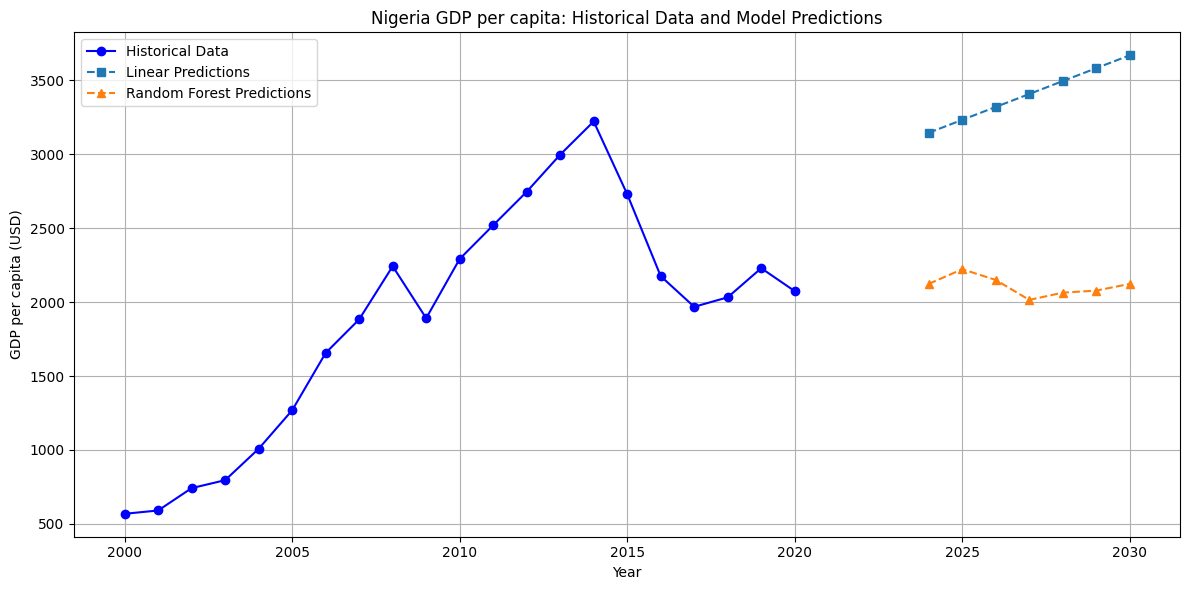

In [6]:
# Create future years for prediction
future_years = np.arange(2024, 2031).reshape(-1, 1)
future_years_scaled = X_scaler.transform(future_years)

# Prepare enhanced features for future predictions
future_years_enhanced = np.column_stack([
    future_years_scaled,
    future_years_scaled ** 2,
    np.sin(2 * np.pi * future_years_scaled),
    np.cos(2 * np.pi * future_years_scaled)
])

# Make predictions
linear_pred_scaled = models['linear'].predict(future_years_scaled)
linear_pred_orig = y_scaler.inverse_transform(linear_pred_scaled.reshape(-1, 1))

rf_pred_scaled = rf_enhanced.predict(future_years_enhanced)
rf_pred_orig = y_scaler.inverse_transform(rf_pred_scaled.reshape(-1, 1))

# Print predictions
print("\nLinear Model Predictions:")
for year, pred in zip(future_years.flatten(), linear_pred_orig.flatten()):
    print(f"Year {year}: ${pred:.2f}")

print("\nRandom Forest Model Predictions:")
for year, pred in zip(future_years.flatten(), rf_pred_orig.flatten()):
    print(f"Year {year}: ${pred:.2f}")

# Visualize results
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(gdp_data['Year'], gdp_data['GDP'], 'b-', label='Historical Data', marker='o')

# Plot predictions
plt.plot(future_years, linear_pred_orig, '--', label='Linear Predictions', marker='s')
plt.plot(future_years, rf_pred_orig, '--', label='Random Forest Predictions', marker='^')

plt.title('Nigeria GDP per capita: Historical Data and Model Predictions')
plt.xlabel('Year')
plt.ylabel('GDP per capita (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Create a 'models' directory if it doesn't exist
import os
if not os.path.exists('models'):
    os.makedirs('models')

# Save base models
for name, model in models.items():
    with open(f'models/nigeria_gdp_{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    print(f"Saved {name} model")

# Save enhanced Random Forest model
with open('models/nigeria_gdp_rf_enhanced_model.pkl', 'wb') as f:
    pickle.dump(rf_enhanced, f)
print("Saved enhanced Random Forest model")

# Save scalers
with open('models/nigeria_gdp_X_scaler.pkl', 'wb') as f:
    pickle.dump(X_scaler, f)
print("Saved X scaler")

with open('models/nigeria_gdp_y_scaler.pkl', 'wb') as f:
    pickle.dump(y_scaler, f)
print("Saved y scaler")

Saved linear model
Saved random_forest model
Saved enhanced Random Forest model
Saved X scaler
Saved y scaler


# CREATING AND INTEGRATING THE API

In [9]:
# Install required packages
!pip install fastapi==0.95.0 uvicorn==0.21.1 pydantic==1.10.7

# Import required libraries
from fastapi import FastAPI, HTTPException
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
from pydantic import BaseModel, Field
import pickle
import numpy as np
from typing import Dict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.9.2
    Uninstalling pydantic-2.9.2:
      Successfully uninstalled pydantic-2.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires pydantic>=2.7.0, but you have pydantic 1.10.7 which is incompatible.
langchain 0.3.7 requires pydantic<3.0.0,>=2.7.4, but you have pydantic 1.10.7 which is incompatible.
langchain-core 0.3.18 requires pydantic<3.0.0,>=2.5.2; python_full_vers

In [11]:
# Create FastAPI instance
app = FastAPI(
    title="Nigeria Economic Predictor",
    description="Predicts GDP based on multiple economic indicators",
    version="1.0.0"
)

# Add CORS middleware
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Load the models we saved in Task 1
try:
    with open('models/nigeria_gdp_rf_enhanced_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('models/nigeria_gdp_X_scaler.pkl', 'rb') as f:
        X_scaler = pickle.load(f)
    with open('models/nigeria_gdp_y_scaler.pkl', 'rb') as f:
        y_scaler = pickle.load(f)
    print("Models loaded successfully!")
except FileNotFoundError:
    print("Error")
except Exception as e:
    print(f"Error loading models: {str(e)}")

Models loaded successfully!


In [12]:
class PredictionInput(BaseModel):
    year: int = Field(..., ge=2024, le=2050)
    population_growth: float = Field(..., ge=-5, le=10)
    agricultural_land_percent: float = Field(..., ge=0, le=100)
    literacy_rate: float = Field(..., ge=0, le=100)
    oil_price: float = Field(..., ge=0, le=200)

    class Config:
        schema_extra = {
            "example": {
                "year": 2024,
                "population_growth": 2.5,
                "agricultural_land_percent": 78.0,
                "literacy_rate": 62.0,
                "oil_price": 75.0
            }
        }

In [13]:
@app.get("/")
def read_root():
    return {
        "message": "Welcome to Nigeria Economic Predictor API",
        "documentation": "/docs",
        "developer": "Your Name",
        "version": "1.0.0"
    }

@app.post('/predict')
def predict(data: PredictionInput) -> Dict:
    try:
        # Prepare input features
        features = np.array([[
            data.year,
            data.population_growth,
            data.agricultural_land_percent,
            data.literacy_rate,
            data.oil_price
        ]])

        # Scale features
        features_scaled = scaler.transform(features)

        # Make prediction
        prediction = model.predict(features_scaled)

        return {
            "status": "success",
            "predicted_gdp": float(prediction[0]),
            "input_data": data.dict()
        }
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

In [15]:
# Import nest_asyncio to allow running async code in notebook
import nest_asyncio
nest_asyncio.apply()

# Run the app
if __name__ == "__main__":
    import uvicorn
    config = uvicorn.Config(app, host="0.0.0.0", port=8000)
    server = uvicorn.Server(config)
    server.run()

INFO:     Started server process [22280]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [22280]


In [16]:
if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=10000)

INFO:     Started server process [22280]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:10000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [22280]


In [17]:
%%writefile requirements.txt
fastapi==0.95.0
uvicorn==0.21.1
pydantic==1.10.7
scikit-learn==1.2.2
numpy==1.24.2
python-multipart==0.0.6
gunicorn==20.1.0

Writing requirements.txt


In [19]:
%%writefile main.py
# Install required packages
!pip install fastapi==0.95.0 uvicorn==0.21.1 pydantic==1.10.7

# Import required libraries
from fastapi import FastAPI, HTTPException
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
from pydantic import BaseModel, Field
import pickle
import numpy as np
from typing import Dict

# Create FastAPI instance
app = FastAPI(
    title="Nigeria Economic Predictor",
    description="Predicts GDP based on multiple economic indicators",
    version="1.0.0"
)

# Add CORS middleware
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Load the models we saved in Task 1
try:
    with open('models/nigeria_gdp_rf_enhanced_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('models/nigeria_gdp_X_scaler.pkl', 'rb') as f:
        X_scaler = pickle.load(f)
    with open('models/nigeria_gdp_y_scaler.pkl', 'rb') as f:
        y_scaler = pickle.load(f)
    print("Models loaded successfully!")
except FileNotFoundError:
    print("Error")
except Exception as e:
    print(f"Error loading models: {str(e)}")

class PredictionInput(BaseModel):
    year: int = Field(..., ge=2024, le=2050)
    population_growth: float = Field(..., ge=-5, le=10)
    agricultural_land_percent: float = Field(..., ge=0, le=100)
    literacy_rate: float = Field(..., ge=0, le=100)
    oil_price: float = Field(..., ge=0, le=200)

    class Config:
        schema_extra = {
            "example": {
                "year": 2024,
                "population_growth": 2.5,
                "agricultural_land_percent": 78.0,
                "literacy_rate": 62.0,
                "oil_price": 75.0
            }
        }

@app.get("/")
def read_root():
    return {
        "message": "Welcome to Nigeria Economic Predictor API",
        "documentation": "/docs",
        "developer": "Your Name",
        "version": "1.0.0"
    }

@app.post('/predict')
def predict(data: PredictionInput) -> Dict:
    try:
        # Prepare input features
        features = np.array([[
            data.year,
            data.population_growth,
            data.agricultural_land_percent,
            data.literacy_rate,
            data.oil_price
        ]])

        # Scale features
        features_scaled = scaler.transform(features)

        # Make prediction
        prediction = model.predict(features_scaled)

        return {
            "status": "success",
            "predicted_gdp": float(prediction[0]),
            "input_data": data.dict()
        }
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=10000)

Writing main.py
